In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To hide warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Telco Customer Data.csv")       # import the dataset
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
# Checking the number of rows and columns in the whole dataset
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))


The dataset contains 4930 rows and 11 columns


From above, we can see that the dataset contains 11 attributes(columns) and 4930 rows. The column called the 'Churn' is the target column. It is the column that holds the predictions from the classification algorithms. The column is a result of binary classification. For a customer that has left the company, he/she would take a value that is equal to 1, answering 'yes' to the question that the customer has left the company. For a customer still using one or more of the company's servives, he/she would have a churn value that is equal to 0, answering 'no' to the question that the customer has left the company 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


There is no empty column

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 455.0+ KB


## Descriptive Statistics

Here, we shall be taking a look at the columns statistically. The numeric columns(float and int data type columns) summary can be found using the describe method as shown below:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4853.0,32.679992,24.395554,0.0,9.00,29.0,56.00,72.00
MonthlyCharges,4853.0,65.321543,29.783655,18.8,40.05,70.6,90.05,118.65


From the above, we can make some deductions;
* The tenure has a minimum of 1 month to 3 years (so the customers considered are those who have used at least one month and a maximum of 3 years (72 months)
* The monthly charges seem to be increasing at par with the tenure month. This makes absolute sense as customers who have stayed longer would probably spend more.

### Data Set Splitting

The aim of this action is to have a a part of the data as our train set while we have a part as our train set. The test set is what we shall use to test the efficiency of our models. The objective reason for taking this action is to prevent against what is called **snopping bias**. This makes sure the evaluation would be on a set that the model has not come across. It does not make sense to test the model with a dataset it has seen before. This helps guide againt overfitting and also prevent the data model from behaving 'foolishly' in the face of data it has not seen before. We do this as follows:

In [8]:
#We import the functionality from scikit learn library
from sklearn.model_selection import train_test_split

#Then we proceed to split our dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 3882 rows x 11 columns
 Test set: 971 rows x 11 columns


From the above, we can see that the splitting allocated 80% of the dataset for training while the remaining 20% is there evaluate the model. Next up is the exploratory data analysis phase

#### Target Attribute : churn value


Here, let us take a look at the count of customers that have left and those still with the company: We previously stated that customers that have left have a churn value of **1** while those left have a churn value of **0**

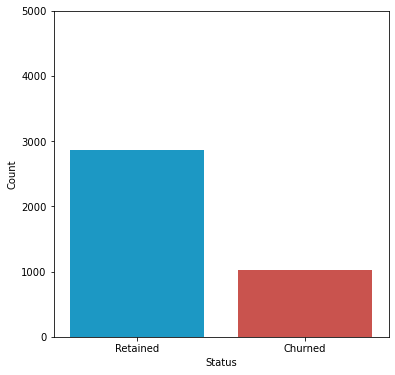

In [9]:

fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Churn', data=train_df, palette=['#00A5E0', '#DD403A'], ax=ax)
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count');
ax.set_ylim([0, 5000]);

As we can see above, the percentage difference between the retained and churned customers is quite high. Let us get the actual percentage below;

In [10]:
train_df['Churn'].value_counts(normalize=True) * 100

No     73.647604
Yes    26.352396
Name: Churn, dtype: float64

From above, we can see that 74% of the customers are retained while 26% of the customers have left the service of the company. We shall address this imbalance later before the onset of the machine learning. Let us do more exploration!


Now, let us split the columns using their data types.This is because different data types have different visualization approaches. While int and float type columns are continuous, the others are categorical. We shall exclude the target attribute in both cases. A quick reminder of what our data types look like is shown below;

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        3882 non-null   object 
 1   tenure            3882 non-null   int64  
 2   OnlineSecurity    3882 non-null   object 
 3   OnlineBackup      3882 non-null   object 
 4   InternetService   3882 non-null   object 
 5   DeviceProtection  3882 non-null   object 
 6   TechSupport       3882 non-null   object 
 7   Contract          3882 non-null   object 
 8   PaperlessBilling  3882 non-null   object 
 9   MonthlyCharges    3882 non-null   float64
 10  Churn             3882 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 333.7+ KB


In [12]:
col=list(train_df.columns)
continuous=[]
categorical=[]

for i in col:
    if train_df[i].dtype=='int64':
        continuous.append(i)
    elif train_df[i].dtype=='float64':
        continuous.append(i)
    else:
        categorical.append(i) 

In [13]:
categorical.remove('Churn')
# We are excluding Churn Value column as we already did the visualization needed on it

print(continuous)
print('\n')
print(categorical)

['tenure', 'MonthlyCharges']


['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


#### Visualization for Continuous Variables


we use the histogram visualization here. We have a plot of count of continuous variables against the variables themselves:

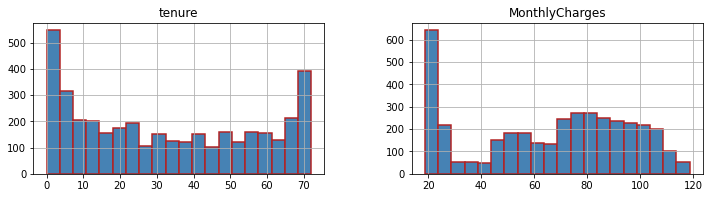

In [14]:
train_df[continuous].hist(figsize=(12, 10),
                          bins=20,
                          layout=(3, 2),
                          color='steelblue',
                          edgecolor='firebrick',
                          linewidth=1.5);

From the above visuals, we have the following observations:
* Safe for the extreme values, the tenure column is pretty uniform in distribution. Most of the customers are new ones since the largest count are those with tenure months=1. We also have pretty much loyal customers with tenure months above 60 months
* The monthly charges are fairly uniform in distribution(safe for the minimum value)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

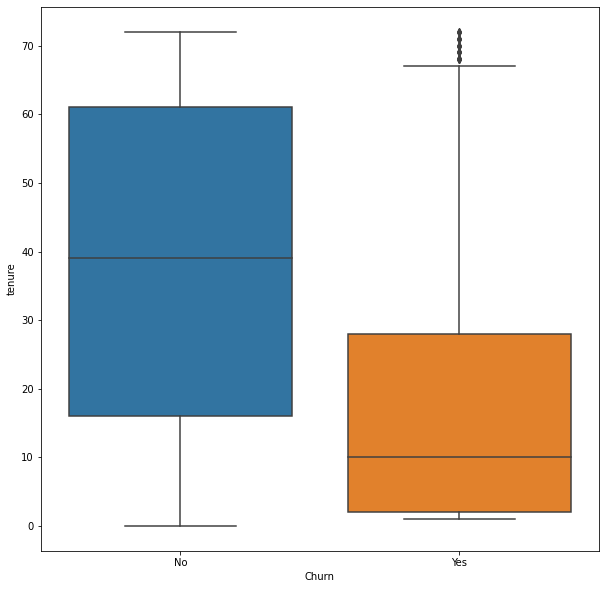

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn', y='tenure', data=train_df)

There seem to be a marked difference between tenure (month) distribution and the churn value types. Customers with high tenure seem to be retained better than the new ones. This supports the saying that it is quite hard to acquire a new customer than not losing existing ones. This speaks about brand loyalty as the years roll by. Also, there are no serious outlier cases too.

For Monthly charges:

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

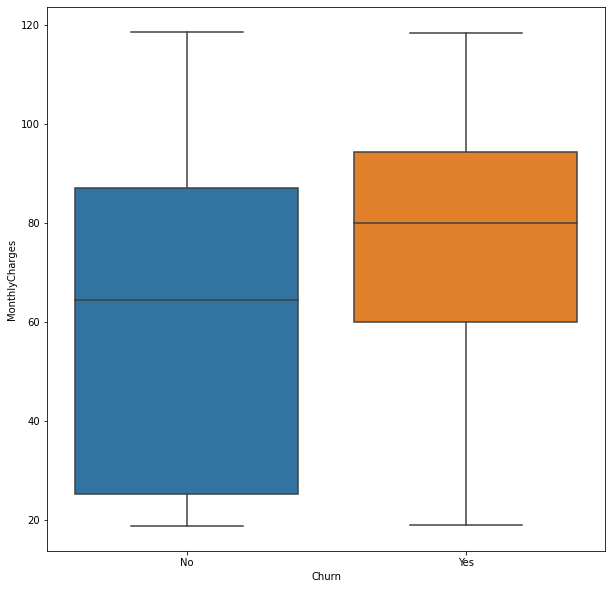

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df)

This is quite interesting as we have no outliers. However,customers that have churned are the ones that pay a higher value in terms of monthly charges. This could mean they are getting same services from competitors at lower prices.

### Visualization for Categorical variables

Here, we shall be exploring visualization with the categorical variables. Kindly recall we have a list that holds them from above. Let us drive straight into them.

In [17]:
print(categorical)

['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']


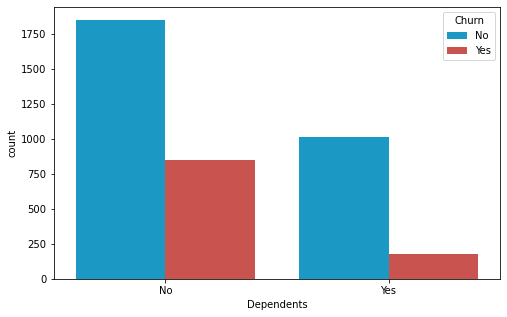

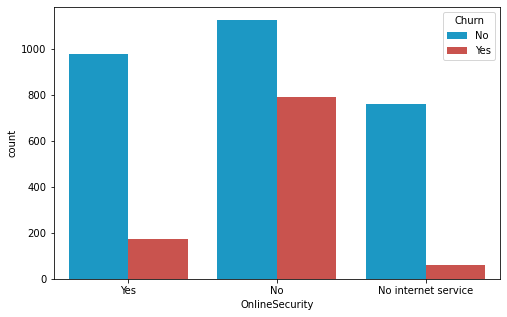

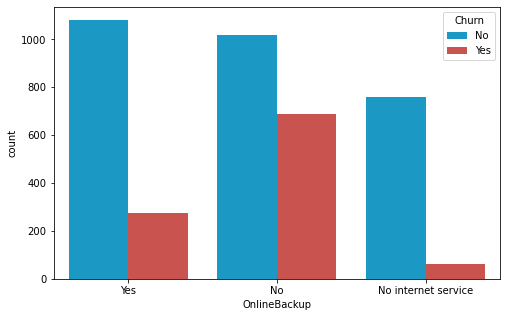

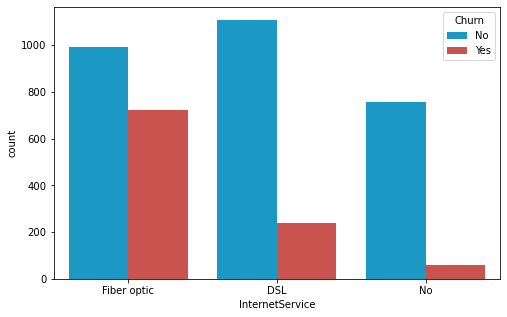

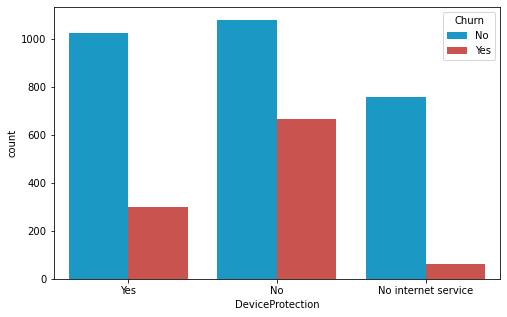

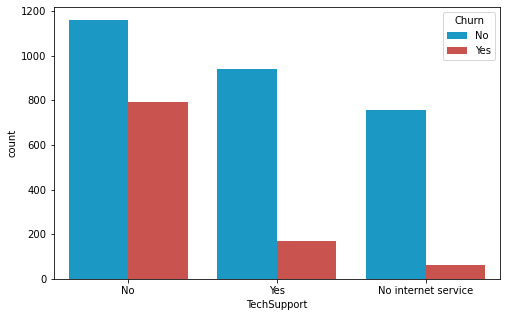

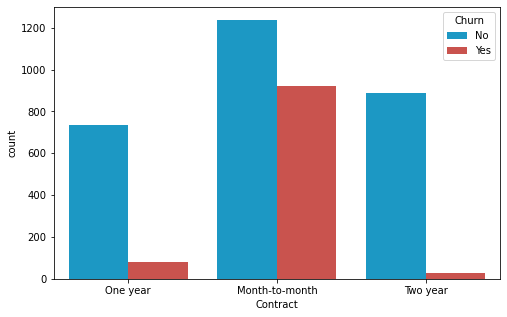

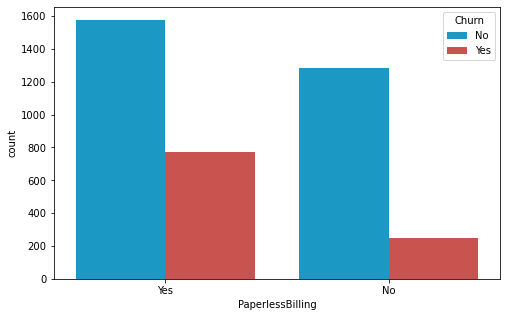

In [18]:
for col in categorical:
    fig = plt.figure(figsize=(8,5))
    sns.countplot( data = train_df, x = train_df[col],hue='Churn',palette=['#00A5E0', '#DD403A'])

We notice the following points about the categorical variables:
* Most Customers are without dependents. Furthermore, those without dependents are less likely to churn
* Fiber optic is the most popular internet service. Intrestingly, some customers do not use the internet service of the company. Customers who use the fibre optic internet service are  markedly likely to churn
* Surprisingly, for those that use the internet service, most do not have online security. Most customers with no oline security are likely to churn.
* For customers that use the internet service, most do not have an online or cloud backup. Hence it is very key to maintain excellent service levels at all times since this can easily cause frustration. Customers without online backup are likely churners
* Most customers with internet service have no device protection. Although this is not really clearly marked. However, the bulk of churners here have no device protection. Having no tech support supports churning.
* Most customers with internet service have no tech support. This is worrisome as the bulk of churners here have no device protection
* Most customers are on a month-to-month contract.
* Most customers do not subscribe to payperless billing. Hence, payment information details within the company's architecture should be excellent to avoid litigation

In [19]:
#Let us check the shape of the train datasets.
train_df.shape

(3882, 11)

## Data Processing

Here, we are concerned with turning features( especially categorical features) into machine readable format. This is essential so as to make our models work with these feastures. At present, there are 8 variables that are categorical which we might want to pre-process. Kindly recall that we have dropped some columns earlier with the reasons for dropping adequately stated.

### Categorical Features Selection

What we want to do here is to check for continuous variables that can be dropped using their distribution types. By confirming their p-value and chi square value, we can decide to drop them if they are well below defined ranges. We can do that as follows:


In [20]:
#We start by importing the stat package to use
from scipy.stats import chi2_contingency
chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(train_df[column], train_df['Churn'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

,Variable,Chi-square,p-value
6,Contract,671.795849,1.322467e-146
1,OnlineSecurity,448.310267,4.473655e-98
3,InternetService,424.195698,7.710358e-93
5,TechSupport,422.259791,2.029792e-92
2,OnlineBackup,349.233800,1.461651e-76
4,DeviceProtection,284.836244,1.407977e-62
7,PaperlessBilling,129.148711,6.292289e-30
0,Dependents,113.561616,1.625508e-26


As we can see, none of these variables has chi square value with p-values less than 0.05.

#### Categorical Features Enconding

The choice encoder here would be the one-hot encoding method. This is preferred to label encoding as it does not have rank problems since our columns are not even ordinal. We proceed as follows:

In [21]:
#we start by passing the columns we want to encode(one hot encoding into a list)
oh=['Churn', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']
train_enc = pd.get_dummies(train_df, columns=oh, drop_first=True)
test_enc = pd.get_dummies(test_df, columns=oh, drop_first=True)
train_enc.head()

,tenure,MonthlyCharges,Churn_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,35,108.35,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1
1,46,69.10,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
2,4,70.20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,20,79.15,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,67,72.35,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1


### Scaling of Continuous Variable

Now, we want to scale the continuous variables. This aims to change the range of values. We are going to use the standard scaler here as follows:

In [22]:
print(continuous)

['tenure', 'MonthlyCharges']


In [23]:
# We start by importing the standard scaler from scikit learn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


train_enc[continuous] = scaler.fit_transform(train_enc[continuous])
test_enc[continuous] = scaler.fit_transform(test_enc[continuous])

In [24]:
train_enc.head() 

,tenure,MonthlyCharges,Churn_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,0.095013,1.454688,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1
1,0.545667,0.137759,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
2,-1.175013,0.174667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.519516,0.474960,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,1.406008,0.246805,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1


In [32]:
train_enc.rename(columns = {'Churn_Yes':'Churn'}, inplace = True)
test_enc.rename(columns = {'Churn_Yes':'Churn'}, inplace = True)


In [33]:
train_enc['Churn'].value_counts()

0    2859
1    1023
Name: Churn, dtype: int64

### Splitting train set into variables

We can now proceed to split the train set into variables as follows. Kindly recall that the target variable which us the churn value is the target variable.

In [34]:
y_train = train_enc['Churn']
x_train = train_enc.drop('Churn', 1)


In [35]:
y_test = test_enc['Churn']
x_test = test_enc.drop('Churn', 1)

## Dealing With Class imbalance

Kindly remember from above that the target variable has a kind of imbalance with one type of the class overly outweighing the order. To deal with this, we use SMOTE ('Synthetic Minority Oversampling Technique') algorithm.

It is necessary to do this because we need to prevent the models from leaning on to the majority while predicting. Let us take a look at the imbalance once more:

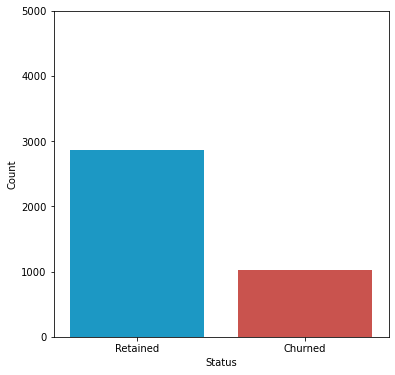

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Churn', data=train_df, palette=['#00A5E0', '#DD403A'], ax=ax)
ax.set_xticklabels(['Retained', 'Churned'])
ax.set_xlabel('Status')
ax.set_ylabel('Count');
ax.set_ylim([0, 5000]);

In [37]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\OmotayoWaheed\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [38]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = over.fit_resample(x_train, y_train)
y_train.value_counts()

1    2859
0    2859
Name: Churn, dtype: int64

In [39]:
x_train.shape

(5718, 16)

In [40]:
y_train.shape

(5718,)

From the above, we can see that the values have been correctly made up by SMOTE and now, the class imbalance is gone

## Models Building

### Baseline Model

A baseline model is a sort of reference to which we know how good or bad our model has fared based on particular metrics. The metric to use here is the **f1 score**. A rule of thumb is that our models must perform better than the baseline model. In an instance where this is not in play, then the model has fared really bad and we should make an overall check as to what might be the problem.

We compute the baseline model as follows;

* Precision = tp/(tp+fp)

* Recall =tp/(tp+fn)

* f1=(2 * Precision * Recall)/(Precision + Recall)

We go ahead to do this for the two categories of churn values, then we get the average of the two f1 scores.

In [41]:
train_enc['Churn'].value_counts()

0    2859
1    1023
Name: Churn, dtype: int64

In [42]:
# When churn value == 0 (when customer is retained)
precision_a = 4151/(4151+1474)
recall_a = 4151/4151

f1_a= (2*precision_a * recall_a)/(precision_a + recall_a)

#When churn value == 1 (when customer has churned)
precision_b= 1474/(1474+4151)
recall_b= 1474/1474

f1_b=(2 * precision_b * recall_b)/(precision_b + recall_b)

#The f1 score is the average of the two
f1 = (f1_a + f1_b)/2

print(f1)

0.6322461711142091


As we can see above, the baseline model has a 63% accurracy. However, each of the model we are going to use should have an accurracy better than this. We see this in the next section

## Model Hyper-parameter Tuning

This is an optimization problem or issue. What we have to do here is to ensure that the hyperparameters passed into our models are the optimum values. This will ensure an accurracy of our result. 

Kindly recall that we have decided to use the following algorithms earlier:
* Logistic Regression
* Support Vector Classifier
* Random Forest Classifier

Kindly note that the optimum parameters used in this work are those that have been confirmed in other studies involving their use.

### Machine Learning Models 

#### Logistic Regression Model

In [43]:
# We import the model from scikit learn
from sklearn.linear_model import LogisticRegression

# We import the tuning dependency
from sklearn.model_selection import GridSearchCV

#lr = LogisticRegression(random_state=42)

# We pass in the optimal hyperparameters for the model
param_grid = {
    'max_iter': [100],
    'penalty': ['l1','l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# We apply the optimal hyperparameter before training the model
lr= GridSearchCV(estimator=LogisticRegression(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

#training the algorithm with the data
lr.fit(x_train, y_train)

# creating the prediction
y_hat1 = lr.predict(x_test)

#### Support Vector Classifier Model

In [44]:
#We import the model from scikit learn
from sklearn.svm import SVC

#svc = SVC(probability=True, random_state=42)


# We pass in the optimal hyperparameters for the model
param_grid = tuned_parameters = [{'kernel': ['rbf'],
                                  'gamma': ['scale', 'auto'],
                                  'C': [.1, 1, 2]},
                                 {'kernel': ['linear'],
                                  'C': [.1, 1, 10]}
                                ]

# We apply the optimal hyperparameter before training the model
svc= GridSearchCV(estimator=SVC(probability=True, random_state=42),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

#training the algorithm with the data
svc.fit(x_train, y_train)

# creating the prediction
y_hat2 = svc.predict(x_test)





#### Random Forest Classifier Model

In [45]:
#We import the model from scikit learn
from sklearn.ensemble import RandomForestClassifier

# We pass in the optimal hyperparameters for the model
#rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

## We apply the optimal hyperparameter before training the model
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='f1',
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

#training the algorithm with the data
rf.fit(x_train, y_train)

# creating the prediction
y_hat3 = rf.predict(x_test)





## Models Evaluation

The models shall be evaluated using the f1 score. We compute the evaluations as follows:

In [46]:
# We start by importing the evaluating metric from scikitlearn
from sklearn.metrics import f1_score

#Logistic Regression
f1_1 = f1_score(y_true=y_test, y_pred=y_hat1)
print('The f1 score for the logistic regression model is {}'.format(f1_1))

#Support Vector Classification
f1_2 = f1_score(y_true=y_test, y_pred=y_hat2)
print('The f1 score for the support vector classification  model is {}'.format(f1_2))

#Random Forest Classifier
f1_3 = f1_score(y_true=y_test, y_pred=y_hat3)
print('The f1 score for the random forest classifier  model is {}'.format(f1_3))

The f1 score for the logistic regression model is 0.6253968253968254
The f1 score for the support vector classification  model is 0.6210191082802548
The f1 score for the random forest classifier  model is 0.6407465007776051
